In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udacity-mlcharity-competition/census.csv
/kaggle/input/udacity-mlcharity-competition/example_submission.csv
/kaggle/input/udacity-mlcharity-competition/test_census.csv


In [2]:
# Kaggle version
df = pd.read_csv("/kaggle/input/udacity-mlcharity-competition/census.csv")
test_df = pd.read_csv("/kaggle/input/udacity-mlcharity-competition/test_census.csv")

In [3]:
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Explore and Analyze Training Data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


## Handling missing values

In [6]:
# Handling missing values
# Check for missing values
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Checking distributions of features

In [7]:
# Total number of records
n_records = df.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = df[df['income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k/n_records*100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


### Imbalanced data: 
there's a **significant disparity** between the two income classes (target calue) within the dataset. Specifically, there are roughly three times as many individuals with incomes of 50,000 or less, when compared to those earning over 50,000. 


we may consider
- involve resamplsing techiques  (oversampling the minority class or undersampling the majority class), 
- using different evaluation metrics that account for imbalances, 
- or considering specialized algorithms tailored for such scenarios ([ref: imbalanced data](https://medium.com/@itbodhi/handling-imbalanced-data-sets-in-machine-learning-5e5f33c70163)).

In [8]:
# Descriptive statistics for numerical features

# Encode the 'income' data to numerical values
df['income'] = df['income'].replace({"<=50K": 0, ">50K": 1})

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns

df.describe()

/tmp/ipykernel_30/2203973865.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({"<=50K": 0, ">50K": 1})


,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

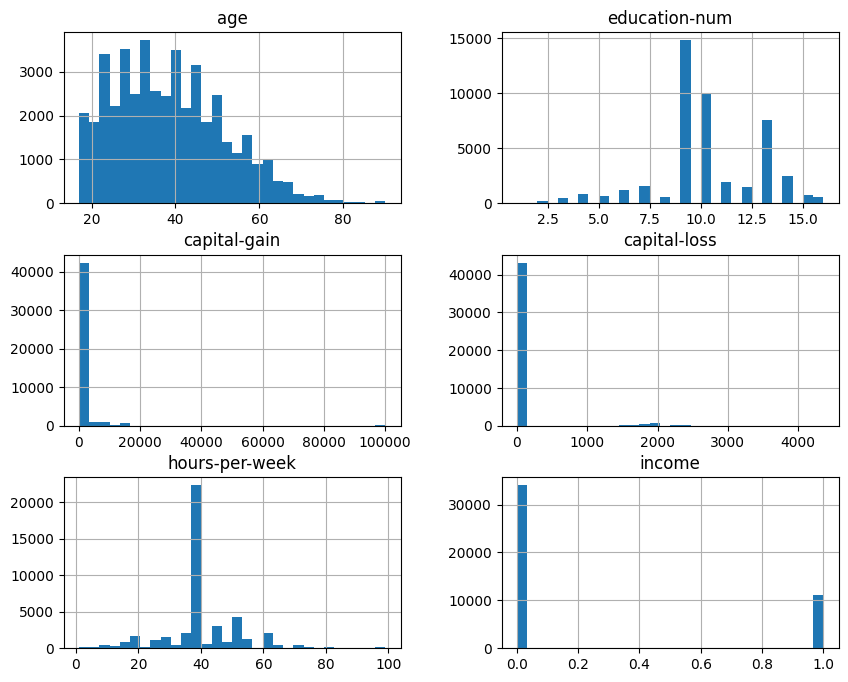

In [9]:
# Histograms: distributions of numerical variable.
df.hist(bins=30, figsize=(10, 8))

### Highly Skewed Featur: `capital-gain` and `capital-loss`
From above Histogram, we can observe highly-skewed feature distributions such as `capital-gain` and `capital-loss`, it is common practice to apply a [logarithmic transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)) on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.


array([[<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>]], dtype=object)

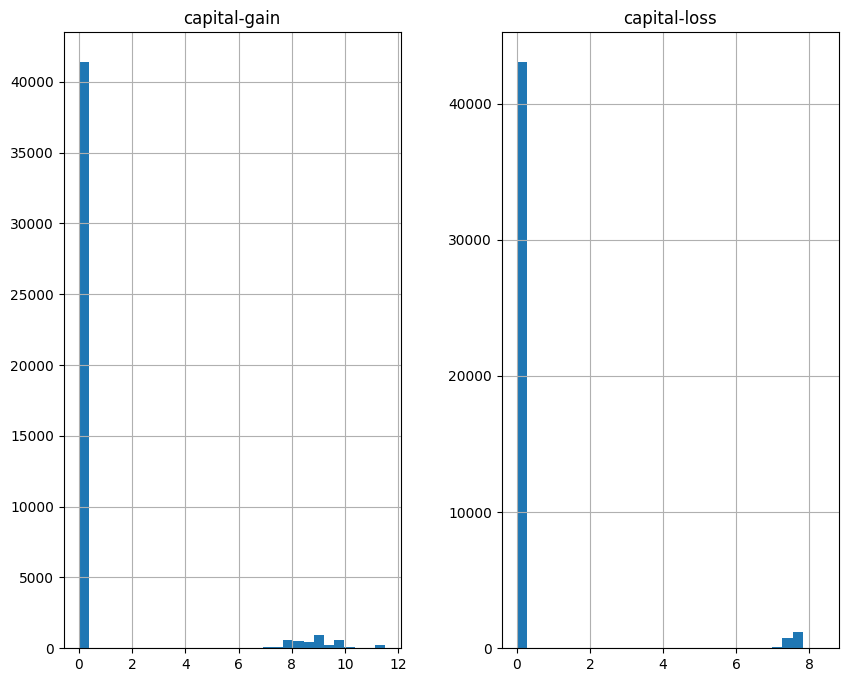

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
features_log_transformed[skewed].hist(bins=30, figsize=(10, 8))

### Moderately right skewed features: `age` 
the square root transformation can help reduce the skew while preserving the relative order and spread of the data.

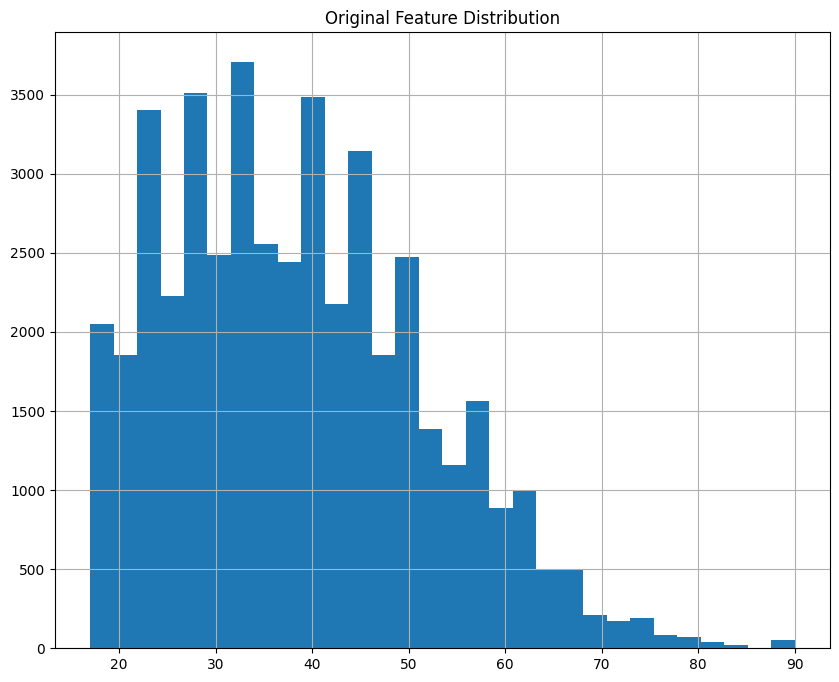

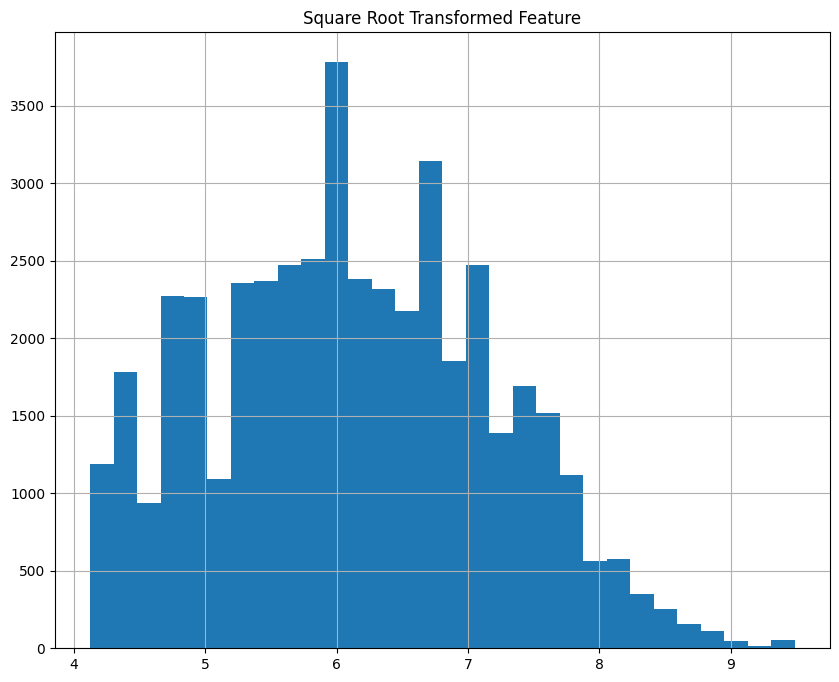

In [11]:
# Log-transform the skewed features
skewed = ['age']
features_sqrt_transformed = pd.DataFrame(data = features_log_transformed)
features_sqrt_transformed[skewed] = np.sqrt(features_sqrt_transformed[skewed])

# Visualize the new log distributions
features_log_transformed[skewed].hist(bins=30, figsize=(10, 8))
plt.title('Original Feature Distribution')
plt.show()
features_sqrt_transformed[skewed].hist(bins=30, figsize=(10, 8))
plt.title('Square Root Transformed Feature')
plt.show()

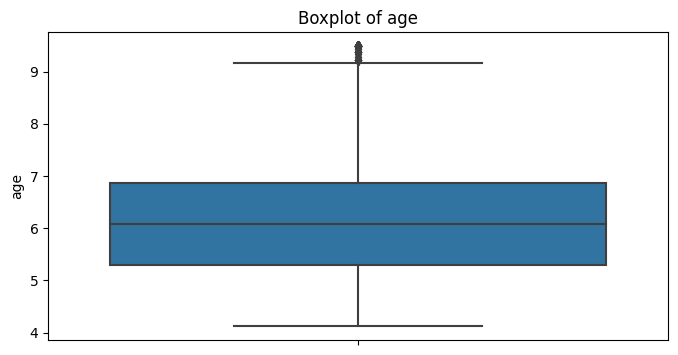

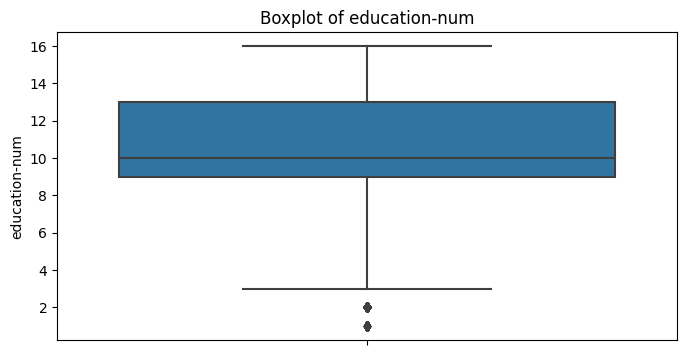

In [12]:
# Box plots: Check for outliers
for col in ['age', 'education-num']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=features_sqrt_transformed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [20]:
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Get outliers for age
outliers_age, lower_age, upper_age = calculate_outliers(features_sqrt_transformed['age'])
number_of_outliers_age = outliers_age.count()

# Get outliers for education-num
outliers_education, lower_education, upper_education = calculate_outliers(features_sqrt_transformed['education-num'])
number_of_outliers_education = outliers_education.count()

# Print out the number of outliers
print(f'Number of outliers in age: {number_of_outliers_age}')
print(f'Number of outliers in education-num: {number_of_outliers_education}')
print(f'Number of data record: {features_sqrt_transformed.shape[0]}')
print(f'Portion of outliers in age: {number_of_outliers_age/features_sqrt_transformed.shape[0]}')
print(f'Por of outliers in education-num: {number_of_outliers_education/features_sqrt_transformed.shape[0]}')

Number of outliers in age: 59
Number of outliers in education-num: 294
Number of data record: 45222
Portion of outliers in age: 0.0013046747158462694
Por of outliers in education-num: 0.006501260448454292


### Handle Outliers:
1. Remove Outliers: If the outliers are due to errors or are unlikely to provide meaningful insights for the analysis, removing them might make sense.
2. Transform Data: Apply transformations (e.g., log transformation) to reduce the influence of outliers.
3. Data Imputation: Replace outliers with a statistic (mean, median) to reduce their impact without removing them.
4. Keep Them: If they are valid observations that provide valuable information, retain them in the analysis.

With 59 outliers in ```age``` (about 0.13% of 45,222) and 294 outliers in ```education-num ```(about 0.65%), these proportions are relatively small compared to the total dataset. This suggests that they might not heavily influence overall statistical analyses. I will choose to keep them.

<Axes: >

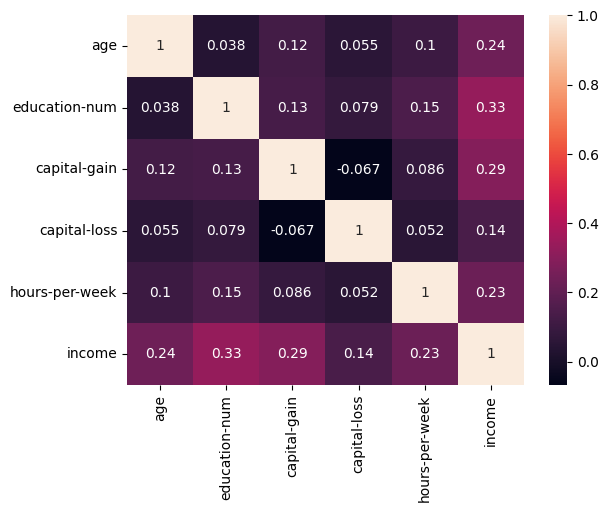

In [14]:
corr_matrix = features_log_transformed[num_col].corr()
sns.heatmap(corr_matrix, annot = True)

In [15]:
# the distribution of categorical vaiables
for col in cat_col:
    print(df[col].value_counts())

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
education_level
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64
marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64
occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales          

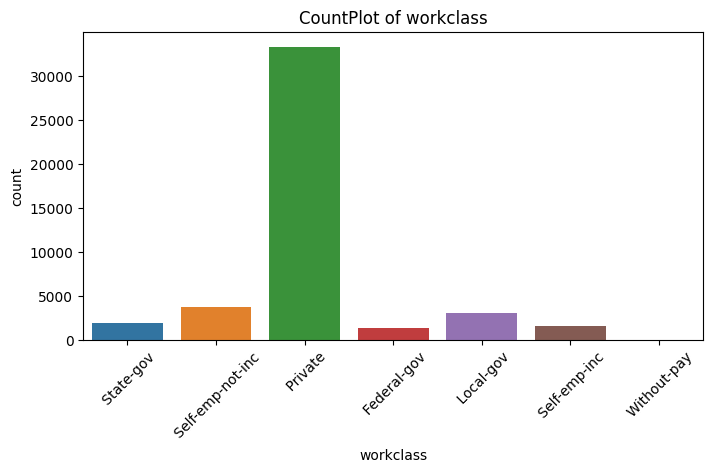

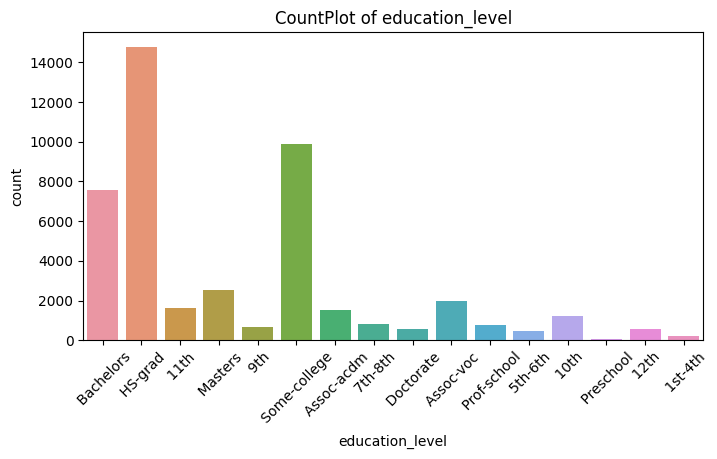

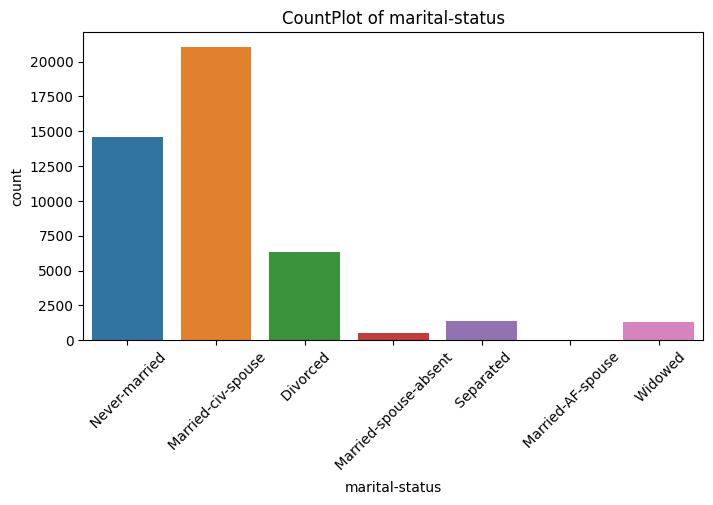

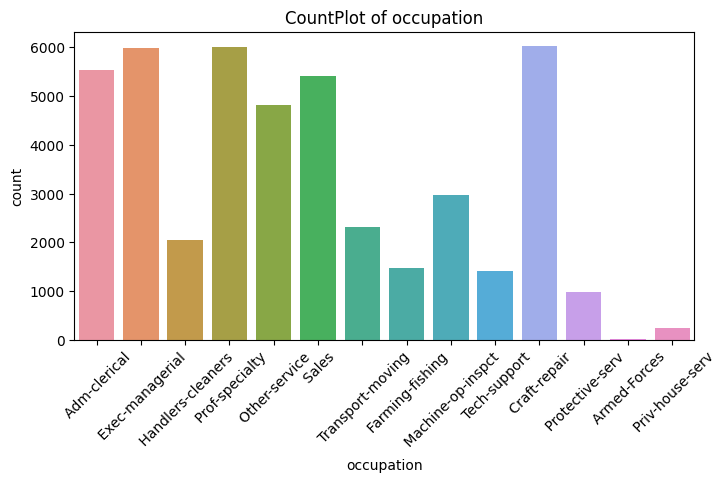

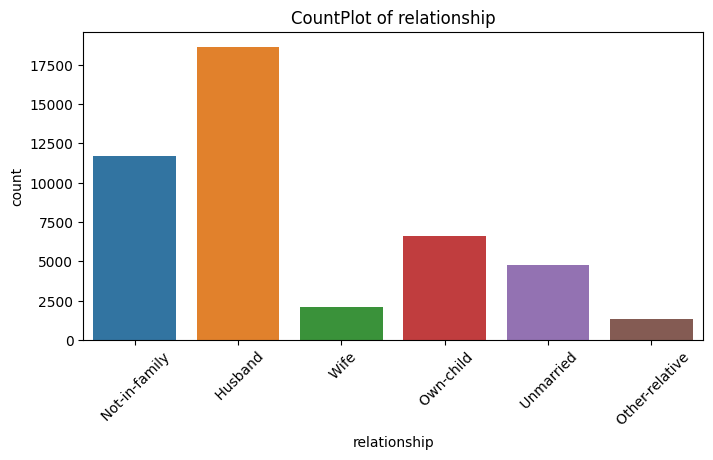

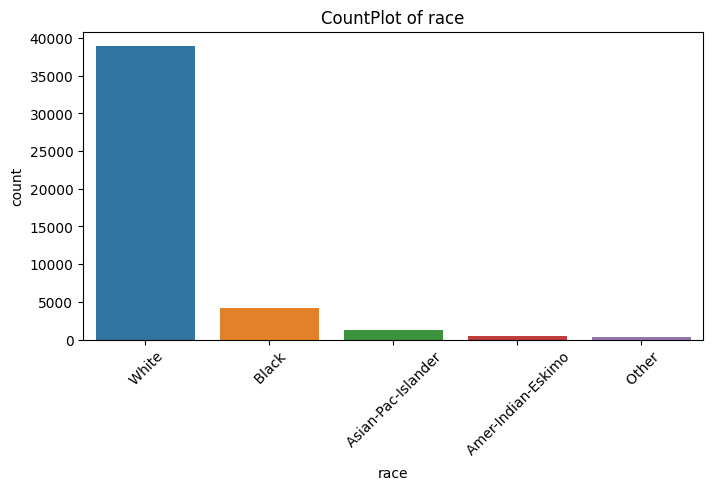

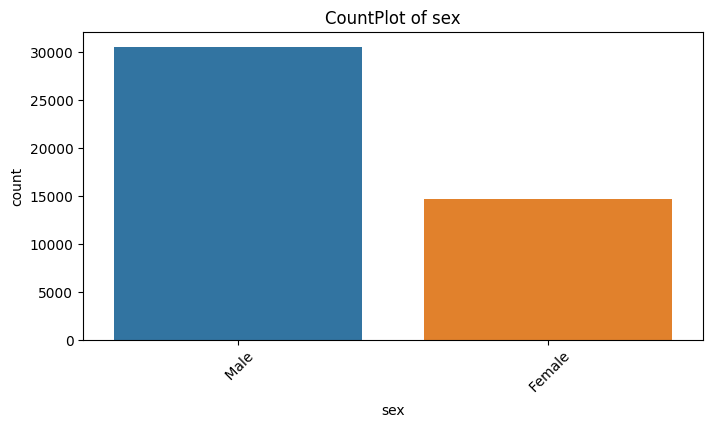

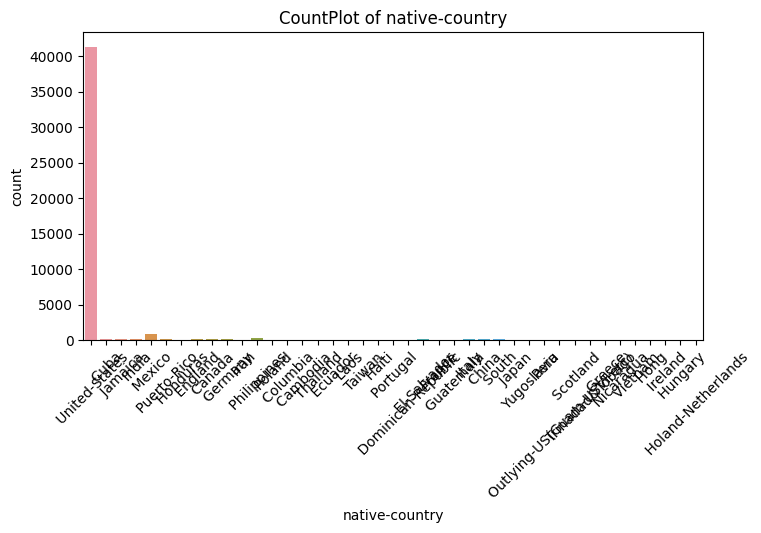

In [16]:
# Visualize categorical distributions
for col in cat_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, orient='h')
    plt.title(f'CountPlot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Handling Categorical Features ([ref:How to Handle Categorical Features, by Ashutosh Sahu](https://medium.com/analytics-vidhya/how-to-handle-categorical-features-ab65c3cf498e))
1. Drop Feature ```native-country```: ```native-country``` has too many categories and extremely unbalanced, ```race``` is also highly imbalanced. Both of them do not significantly contribute to the model, and may lead to overfitting. I decide to drop it entirely.
2. Freuquency Encoding for ```race``` and ```workclass```: these two features are highly unbalanced, it retain some information about the distribution of categories without introducing too many dimensions (as one-hot encoding would). And it work well with tree-base algorithms.
3. Ordinal Number Encoding for ```education_level```: ```education_level``` is are inherently ordered, I choose to use ordinal encoding instead of one-hot encoding.
4. One Hot Encoding: features with fewer categories (like ```sex```,  ```relationship```, ```marital-status```), one-hot encoding can be directly applied. For feature ```occupation``` I choose to combine low-count categories into a single "Other" category, then apply one-hot encoding.


In [37]:
def handle_cate(data, threshold = 1000):
    
    df = data.copy()
    # drop feature 'native-country'
    df = df.drop('native-country', axis=1)
    
    # Strip whitespace from categorical columns
    for col in cat_col:
        if col in df.columns:
            df[col] = df[col].str.strip()
    
    # Freuquency Encoding for ```race``` and ```workclass```
    race_map = df['race'].value_counts().to_dict()
    df['race'] = df['race'].map(race_map)
    workclass_map = df['workclass'].value_counts().to_dict()
    df['workclass'] = df['workclass'].map(workclass_map)
    
    # Ordinal Number Encoding for education_level
    # Define an ordered list for education levels from lowest to highest
    education_order = [
            'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', 
            '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
            'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
    # Map each education level to an ordinal number based on the defined order
    education_map= {level: i for i, level in enumerate(education_order)}
    df['education_level'] = df['education_level'].map(education_map)
    
    # feture: 'occupation' - combine low-frequency ones
    occupation_counts = df['occupation'].value_counts()
    low_freq_occupations = occupation_counts[occupation_counts < threshold].index
    df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x in low_freq_occupations else x)
    
    # One Hot Encoding
    df_encoded = pd.get_dummies(
    df, 
    columns=['sex','occupation', 'relationship', 'marital-status'], 
    prefix=['sex','occupation', 'relationship', 'marital-status'])
    
    bool_col = df_encoded.select_dtypes(include=['bool']).columns
    df_encoded[bool_col] = df_encoded[bool_col].astype(int)
    
    return df_encoded

In [38]:
df_encoded = handle_cate(features_log_transformed)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   45222 non-null  int64  
 1   workclass                             45222 non-null  int64  
 2   education_level                       45222 non-null  int64  
 3   education-num                         45222 non-null  float64
 4   race                                  45222 non-null  int64  
 5   capital-gain                          45222 non-null  float64
 6   capital-loss                          45222 non-null  float64
 7   hours-per-week                        45222 non-null  float64
 8   income                                45222 non-null  int64  
 9   sex_Female                            45222 non-null  int64  
 10  sex_Male                              45222 non-null  int64  
 11  occupation_Adm-

In [39]:
df_encoded.head(3)

,age,workclass,education_level,education-num,race,capital-gain,capital-loss,hours-per-week,income,sex_Female,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,1946,12,13.0,38903,7.684784,0.0,40.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,3796,12,13.0,38903,0.000000,0.0,13.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,33307,8,9.0,38903,0.000000,0.0,40.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       45222 non-null  int64  
 1   age              45205 non-null  float64
 2   workclass        45200 non-null  object 
 3   education_level  45202 non-null  object 
 4   education-num    45208 non-null  float64
 5   marital-status   45201 non-null  object 
 6   occupation       45200 non-null  object 
 7   relationship     45206 non-null  object 
 8   race             45203 non-null  object 
 9   sex              45203 non-null  object 
 10  capital-gain     45207 non-null  float64
 11  capital-loss     45205 non-null  float64
 12  hours-per-week   45209 non-null  float64
 13  native-country   45206 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


# Data Precocessing